In [115]:
# import all required packages 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlalchemy as sqla
%matplotlib inline


# introduction 
investigate European Soccer Database.
The database consists of seven tables namely 'Country', 'League', 'Player', 'Player Attributes', 'Team', 'Team Attributes', and 'Match'. 
this dataset contains 11 different European Leagues between 2008 and 2016.
The original source of the database found on (https://www.kaggle.com/datasets/hugomathien/soccer)


# questions

**1. What is the top five ranked home teams?**

**2.How many league played in germany and what is the league name ?**

**3.what are the goals for home & away teams in each league?**

**4. what is the lowest five winner teams in goals?**

**5.what is the score Gaols for home team per season?**

**6.what is the score of Gaols for away team per season?**

**7. what is the average of Hieght and wieght of players?**


# wrangling data

**Gathering data from SQLite**

In [116]:
#opening connection to SQLite database with SQLAlchemy and read data
soccer = sqla.create_engine('sqlite:///database.sqlite')
#reading files in CSV at jupyter
#recieve all tables
df_country = pd.read_sql('select * from Country', soccer)
df_league = pd.read_sql('select * from League', soccer)
df_player = pd.read_sql('select * from Player', soccer)
df_player_attr = pd.read_sql('select * from Player_Attributes', soccer)
df_team = pd.read_sql('select * from Team', soccer)
df_team_attr = pd.read_sql('select * from Team_Attributes', soccer)
df_match = pd.read_sql('select * from Match', soccer)

Assesing data to check thier General Properties; 

In [117]:
# shape of team ( columns and rows )
df_team.shape

(299, 5)

In [118]:
# shape of team attributes ( columns and rows )
df_team_attr.shape

(1458, 25)

In [119]:
# shape of country ( columns and rows )
df_country.shape

(11, 2)

In [120]:
# shape of league (columns and rows )
df_league.shape

(11, 3)

In [121]:
# check missing value 
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [122]:
# check for null values
df_team.isnull().sum()

id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64

In [123]:
df_team.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
294    False
295    False
296    False
297    False
298    False
Length: 299, dtype: bool

In [124]:
# check duplicates 
df_team.duplicated().sum()

0

In [125]:
# check data type
df_team.dtypes

id                    int64
team_api_id           int64
team_fifa_api_id    float64
team_long_name       object
team_short_name      object
dtype: object

In [126]:
# check missing value
df_team_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

In [127]:
df_team_attr.isnull().sum()

id                                  0
team_fifa_api_id                    0
team_api_id                         0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64

In [128]:
# check for null values
df_team_attr.isnull().sum().any()

True

In [129]:
# check duplicates
df_team_attr.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1453    False
1454    False
1455    False
1456    False
1457    False
Length: 1458, dtype: bool

In [130]:
df_team_attr.duplicated().sum()

0

In [131]:
# check for null values
df_team_attr.duplicated().sum().any()

False

In [132]:
# check type of data
df_team_attr.dtypes

id                                  int64
team_fifa_api_id                    int64
team_api_id                         int64
date                               object
buildUpPlaySpeed                    int64
buildUpPlaySpeedClass              object
buildUpPlayDribbling              float64
buildUpPlayDribblingClass          object
buildUpPlayPassing                  int64
buildUpPlayPassingClass            object
buildUpPlayPositioningClass        object
chanceCreationPassing               int64
chanceCreationPassingClass         object
chanceCreationCrossing              int64
chanceCreationCrossingClass        object
chanceCreationShooting              int64
chanceCreationShootingClass        object
chanceCreationPositioningClass     object
defencePressure                     int64
defencePressureClass               object
defenceAggression                   int64
defenceAggressionClass             object
defenceTeamWidth                    int64
defenceTeamWidthClass             

In [133]:
 # check for missing value 
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


In [134]:
# check null values 
df_country.isnull().sum()

id      0
name    0
dtype: int64

In [135]:
# check duplicates
df_country.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
dtype: bool

In [136]:
# check duplicates 
df_country.duplicated().sum().any()

False

In [137]:
# check data type
df_country.dtypes

id       int64
name    object
dtype: object

In [138]:
# check shape of player (columns and row)
df_player.shape

(11060, 7)

In [139]:
# check missing value
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [140]:
# check null value
df_player.isnull().sum().any()

False

In [141]:
# check duplicates 
df_player.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11055    False
11056    False
11057    False
11058    False
11059    False
Length: 11060, dtype: bool

In [142]:
df_player.duplicated().sum().any()

False

In [143]:
# check data type
df_player.dtypes

id                      int64
player_api_id           int64
player_name            object
player_fifa_api_id      int64
birthday               object
height                float64
weight                  int64
dtype: object

In [144]:
# check missing value
df_league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


In [145]:
# check null value
df_league.isnull().sum()

id            0
country_id    0
name          0
dtype: int64

In [146]:
# check duplicates 
df_league.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
dtype: bool

In [147]:
df_league.duplicated().sum().any()

False

In [148]:
# check data type
df_league.dtypes

id             int64
country_id     int64
name          object
dtype: object

In [149]:
df_player_attr.shape

(183978, 42)

In [150]:
# check missing value
df_player_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [151]:
# checking null values
df_player_attr.isnull().sum().any()
# there are null value will drop in cleaning stage

True

In [152]:
df_player_attr.duplicated().any()

False

In [153]:
# check shape of data " columns and rows"
df_match.shape

(25979, 115)

In [154]:
# check for missing value
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


In [155]:
# check null value 
df_match.isnull().sum()

id                0
country_id        0
league_id         0
season            0
stage             0
              ...  
GBD           11817
GBA           11817
BSH           11818
BSD           11818
BSA           11818
Length: 115, dtype: int64

In [156]:
df_match.duplicated().sum()

0

after assesing data there is no duplicate data , and now we have to clean data set as there are some Columns need to rename 
also there are missing value , datatype need to convert, and drop repeated columns after merging data.

**Cleaning Data**

_firstly drop null value & assesing data of country and league_

In [157]:
#Clean df_Team by removing null value
df_team.dropna(axis = 1 , inplace=True)

In [158]:
#check data after drop null values
df_team.isnull().sum().any()

False

In [159]:
# clean df_team attrubitues by removing null value 
df_team_attr.dropna(axis=1 , inplace=True)

In [160]:
df_team_attr.isnull().sum().any()

False

In [161]:
# clean df_player by removing null value
df_player.dropna(axis=1 , inplace=True)

In [162]:
df_player.isnull().sum().any()

False

In [163]:
# clean df_match by removing null value 
df_match.dropna(axis=1,inplace=True)

In [164]:
df_match.isnull().sum().any()

False

In [165]:
df_league.head(1)

,id,country_id,name
0,1,1,Belgium Jupiler League


In [166]:
df_country.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [167]:
# i will make merge for all match details like data of country,league, match, and teams "awaay and home team" to help me in check and analyze questions i brainstormed.

In [168]:
# merge data of country and league on creation dataframe called "df_combined" to get Country name and league name
df_combined = df_league.merge(df_country,left_on='country_id',right_on='id',how='inner')
df_combined.head(1)

,id_x,country_id,name_x,id_y,name_y
0,1,1,Belgium Jupiler League,1,Belgium


In [169]:
# drop unneeded columns
df_combined.drop(columns=['id_y'],inplace=True ,axis=1)

In [170]:
# rename id_x column
df_combined.rename(columns={'id_x':'league_id'},inplace=True)

In [171]:
df_combined.head(1)

,league_id,country_id,name_x,name_y
0,1,1,Belgium Jupiler League,Belgium


In [172]:
#rename columns
df_combined.rename(columns={'name_x':'league_name','name_y':'country_name'},inplace=True)

In [173]:
# convert datetime  to date format
df_match['date'] =pd.to_datetime(df_match['date'])

In [174]:
df_match.shape

(25979, 11)

In [175]:
#displayy match data to get the needed information i want to merger all match details 
df_match.head(1)
# so i need to add for ( country name & league name) details of goals on home or way stadium 

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1


In [176]:
#merge df_combined datafram creation from(country & league) with match data in creation dataframe called "df_match_info" to get connected home and away goals winth country and league name
df_match_info =  df_match.merge(df_combined, how='inner', left_on='country_id', right_on='country_id')
df_match_info.head(1)

,id,country_id,league_id_x,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,league_id_y,league_name,country_name
0,1,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,1,Belgium Jupiler League,Belgium


In [177]:
#rename columns name to be clear
df_match_info.drop(columns=['league_id_y'],inplace=True, axis=1)

In [178]:
df_match_info.head(1)

,id,country_id,league_id_x,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,league_name,country_name
0,1,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,Belgium Jupiler League,Belgium


In [179]:
#rename column
df_match_info.rename(columns={'league_id_x':'league_id'},inplace=True)

In [180]:
df_match_info.head(1)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,league_name,country_name
0,1,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,Belgium Jupiler League,Belgium


In [181]:
df_team.head(1)

,id,team_api_id,team_long_name,team_short_name
0,1,9987,KRC Genk,GEN


In [182]:
#merge team dataframe (home_team info )with creation dataframe df_match_info to get team name as home team name 
df_match_info = df_match_info.merge(df_team, how='inner', left_on='home_team_api_id', right_on='team_api_id')

In [183]:
df_match_info.head(1)

,id_x,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,league_name,country_name,id_y,team_api_id,team_long_name,team_short_name
0,1,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,Belgium Jupiler League,Belgium,1,9987,KRC Genk,GEN


In [184]:
df_match_info.drop(columns=['id_x','id_y','team_short_name'],inplace=True, axis=1)

In [185]:
df_match_info.head(1)

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,league_name,country_name,team_api_id,team_long_name
0,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,Belgium Jupiler League,Belgium,9987,KRC Genk


In [186]:
#rename column
df_match_info.rename(columns={'team_long_name':'home_team_name'},inplace=True)

In [187]:
df_match_info.head(1)

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,league_name,country_name,team_api_id,home_team_name
0,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,Belgium Jupiler League,Belgium,9987,KRC Genk


In [188]:
#merge team dataframe (away_team info )with creation dataframe df_match_info to get away team as away team name 
df_match_info = df_match_info.merge(df_team, how='inner', left_on='away_team_api_id', right_on='team_api_id')

In [189]:
df_match_info.head(1)

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,league_name,country_name,team_api_id_x,home_team_name,id,team_api_id_y,team_long_name,team_short_name
0,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,Belgium Jupiler League,Belgium,9987,KRC Genk,2,9993,Beerschot AC,BAC


In [190]:
#drop unneeded column
df_match_info.drop(columns=['team_api_id_y','team_api_id_x'],inplace=True, axis=1)

In [191]:
#rename column 
df_match_info.rename(columns={'team_long_name':'away_team_name'},inplace=True)

In [192]:
df_match_info.head(1)

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,league_name,country_name,home_team_name,id,away_team_name,team_short_name
0,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,Belgium Jupiler League,Belgium,KRC Genk,2,Beerschot AC,BAC


In [193]:
#drop unneeded column
df_match_info.drop(columns=['id','team_short_name'],inplace=True, axis=1)

In [194]:
# create function to detect who is the winner team from the team names data; 
# and add column match winner to fillin Tie or home team name  or away team name is winner!
def match_winner(row):
    home_score = row[0]
    away_score = row[1]
    home_team_name = row[2]
    away_team_name = row[3]
    
    if home_score > away_score:
        return home_team_name
    elif home_score < away_score:
        return away_team_name
    else:
        return 'Tie'

df_match_info['match_winner']  = df_match_info[['home_team_goal', 'away_team_goal', 'home_team_name', 'away_team_name']].apply(match_winner, axis=1)

In [195]:
df_match_info.head(1)

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,league_name,country_name,home_team_name,away_team_name,match_winner
0,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,Belgium Jupiler League,Belgium,KRC Genk,Beerschot AC,Tie


In [196]:
# thirdly assess and clean data of player_name and player_attr

In [197]:
df_player.head(3)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163


In [198]:
#convert birthday type to datetime 
df_player['birthday']= pd.to_datetime(df_player['birthday'])

In [199]:
df_player.head(1)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187


In [200]:
df_player_attr.head(3)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0


In [201]:
#convert date type to datetime 
df_player_attr['date']= pd.to_datetime(df_player_attr['date'])

In [202]:
df_player_attr.head(1)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


In [203]:
# drop missing values 
df_player_attr.dropna(axis=1, inplace=True)

In [204]:
df_player_attr.isnull().sum().any()

False

In [205]:
# check duplicate names in "team name"
df_team.duplicated().sum()

0

In [206]:
# make sure there is no duplicates
df_team.duplicated().sum().any()

False

In [207]:
# fourth cleaning team_attr data
df_team_attr.head(1)
#convert date type to datetime 
df_team_attr['date']= pd.to_datetime(df_team_attr['date'])

In [208]:
df_team_attr.head(1)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22,60,Balanced,Little,50,Mixed,Organised,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover


In [209]:
# save all cleaning and modifying process to the data
df_match.to_csv('match_cleaned.csv')
df_country.to_csv('country_cleaned.csv')
df_team.to_csv('team_cleaned.csv')
df_team_attr.to_csv('team_attr_cleaned.csv')
df_player.to_csv('player_cleaned')
df_player_attr.to_csv('player_attr.csv')

# Exploratory & visulaize our data and answering the questions at the first of our investigation report.


In [210]:
#1. What is the top five ranked home teams
# i will use query to filter no. of goals then count it. 
home_top = df_match_info.query('home_team_goal >away_team_goal')['home_team_name'].value_counts()[:5]
home_top 

FC Barcelona         131
Real Madrid CF       129
Celtic               120
Manchester United    116
Manchester City      113
Name: home_team_name, dtype: int64

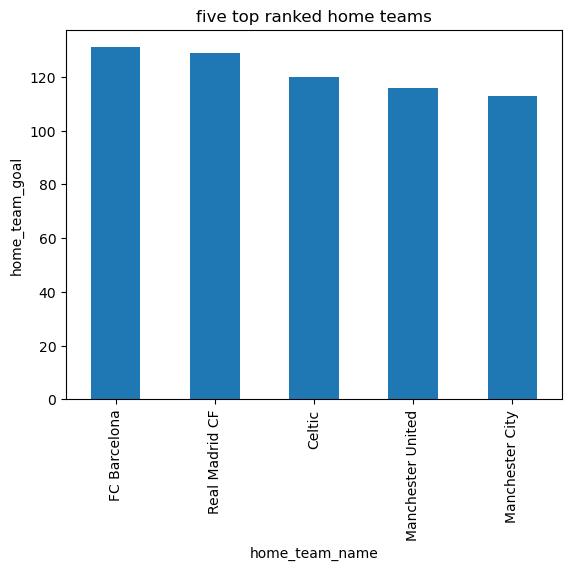

In [211]:
# now i will visulaize the answer by display bar plot
df_match_info.query('home_team_goal >away_team_goal')['home_team_name'].value_counts()[:5].plot(kind="bar");
plt.title("five top ranked home teams");
plt.ylabel("home_team_goal");
plt.xlabel("home_team_name");


In [212]:
#2.How many league played in germany and what is the league name ?
# i will use match_info dataframe to get the league name which played in germany.
league_of_germany = df_match_info[df_match_info['country_name']=='Germany'].get(['league_name'])
league_of_germany
# so the league name which played in germany is 'Bundesliga' and it's played in germany '2448 times'

,league_name
7808,Germany 1. Bundesliga
7809,Germany 1. Bundesliga
7810,Germany 1. Bundesliga
7811,Germany 1. Bundesliga
7812,Germany 1. Bundesliga
...,...
10251,Germany 1. Bundesliga
10252,Germany 1. Bundesliga
10253,Germany 1. Bundesliga
10254,Germany 1. Bundesliga


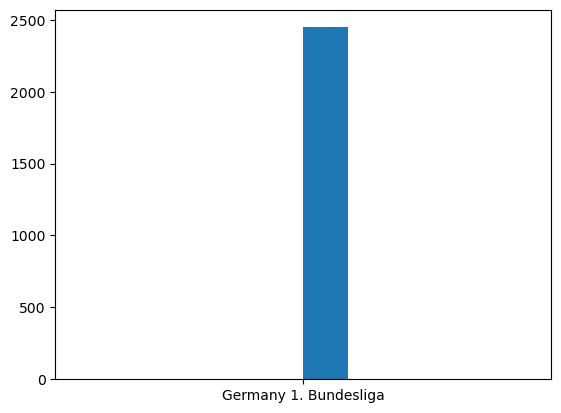

In [213]:
# i will display the name of league " Bundesliga" played in germany 2448 times with histogram 
plt.hist(df_match_info[df_match_info['country_name']=='Germany'].get(['league_name']));

In [214]:
#3.what are the goals for home & away teams in each league?
#i will fillter data of match info "df_match_info" to get name of home & away team names with each league
df_match_info.groupby(['league_name','home_team_name'])['home_team_goal'].sum().sort_values()[:10]

league_name               home_team_name      
Germany 1. Bundesliga     SpVgg Greuther Fürth    10
Spain LIGA BBVA           Córdoba CF              12
Portugal Liga ZON Sagres  Feirense                13
France Ligue 1            AC Arles-Avignon        14
Portugal Liga ZON Sagres  Trofense                14
Italy Serie A             Pescara                 15
Netherlands Eredivisie    FC Dordrecht            15
Portugal Liga ZON Sagres  Tondela                 15
Germany 1. Bundesliga     SV Darmstadt 98         15
Belgium Jupiler League    KAS Eupen               15
Name: home_team_goal, dtype: int64

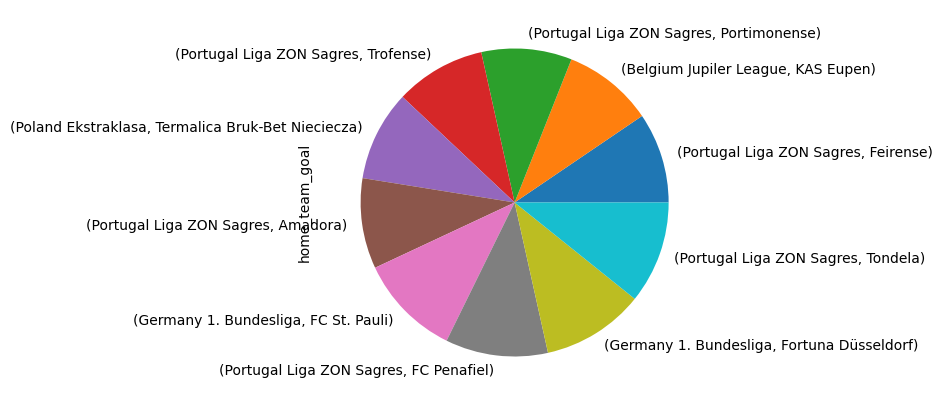

In [215]:
# now let's displaying the league name with the team name based on goals gain by pie chart
df_match_info.groupby(['league_name','home_team_name'])['home_team_goal'].count().sort_values()[:10].plot.pie(figsize=(5, 5));

In [216]:
# now lets display away team name and goals to get name of teams in front of league name with the number of participation 
# now let's displaying the league name with the team name based on goals gain by pie chart
df_match_info.groupby(['league_name','away_team_name'])['away_team_goal'].sum().sort_values()[ :10]

league_name               away_team_name         
France Ligue 1            FC Metz                     5
                          AC Arles-Avignon            7
Italy Serie A             Reggio Calabria             7
Portugal Liga ZON Sagres  Uniao da Madeira            8
Spain LIGA BBVA           Hércules Club de Fútbol     9
Netherlands Eredivisie    FC Dordrecht                9
Portugal Liga ZON Sagres  Amadora                    10
Germany 1. Bundesliga     SC Paderborn 07            10
Spain LIGA BBVA           Córdoba CF                 10
England Premier League    Middlesbrough              11
Name: away_team_goal, dtype: int64

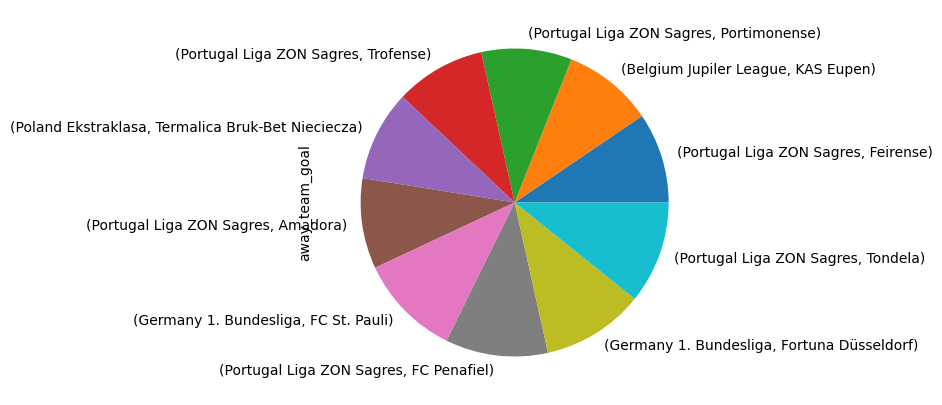

In [217]:
# now let's displaying the league name with the team name based on goals gain by pie chart
df_match_info.groupby(['league_name','away_team_name'])['away_team_goal'].count().sort_values()[:10].plot.pie(figsize=(5, 5));

In [218]:
#4. what is the lowest five winner teams in goals?
df_match_info[df_match_info['match_winner']!='Tie'].groupby(['match_winner'])['match_winner'].count().sort_values(ascending=True)[:5]

match_winner
AC Arles-Avignon         3
Córdoba CF               3
DSC Arminia Bielefeld    4
SpVgg Greuther Fürth     4
FC Dordrecht             4
Name: match_winner, dtype: int64

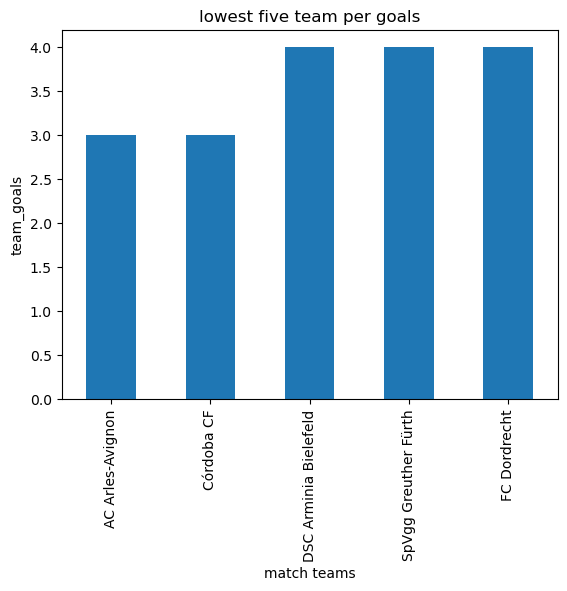

In [219]:
# now i display bar chart to see the lowest five teams on x label with the goals on y label 
df_match_info[df_match_info['match_winner']!='Tie'].groupby(['match_winner'])['match_winner'].count().sort_values(ascending=True)[:5].plot(kind='bar');
plt.xlabel('match teams');
plt.ylabel('team_goals')
plt.title('lowest five team per goals');

In [220]:
#5.what is the score of Gaols for each home team per season?
df_match_info.groupby(['home_team_name','season'])['home_team_goal'].sum().sort_values(ascending=False)[ :7]

home_team_name  season   
FC Barcelona    2011/2012    73
Real Madrid CF  2015/2016    70
                2011/2012    70
Chelsea         2009/2010    68
Real Madrid CF  2012/2013    67
FC Barcelona    2015/2016    67
Real Madrid CF  2014/2015    65
Name: home_team_goal, dtype: int64

<AxesSubplot:ylabel='home_team_goal'>

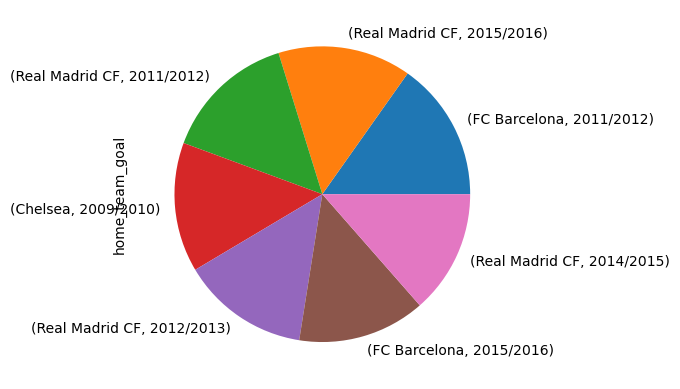

In [221]:
# i am display pie chart to see each home team beside the season and visulaized based on score of goals
df_match_info.groupby(['home_team_name','season'])['home_team_goal'].sum().sort_values(ascending=False)[ :7].plot(kind='pie')

In [222]:
#6.what is the score of Gaols for away team per season?
df_match_info.groupby(['away_team_name','season'])['away_team_goal'].sum().sort_values(ascending=False)[ :7]

away_team_name  season   
Real Madrid CF  2014/2015    53
FC Barcelona    2012/2013    52
Celtic          2013/2014    52
Real Madrid CF  2011/2012    51
FC Barcelona    2010/2011    49
Liverpool       2013/2014    48
PSV             2015/2016    47
Name: away_team_goal, dtype: int64

<AxesSubplot:ylabel='away_team_goal'>

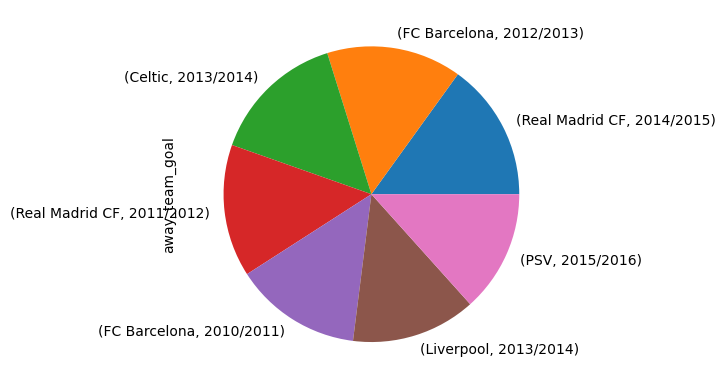

In [223]:
# i am display pie chart to see each home team beside the season and visulaized based on score of goals
df_match_info.groupby(['away_team_name','season'])['away_team_goal'].sum().sort_values(ascending=False)[ :7].plot(kind='pie')

In [224]:
#7. what is the average of Hieght and wieght of players?


In [225]:
# i will get the mean for player height
df_player.height.mean()


181.86744484628662

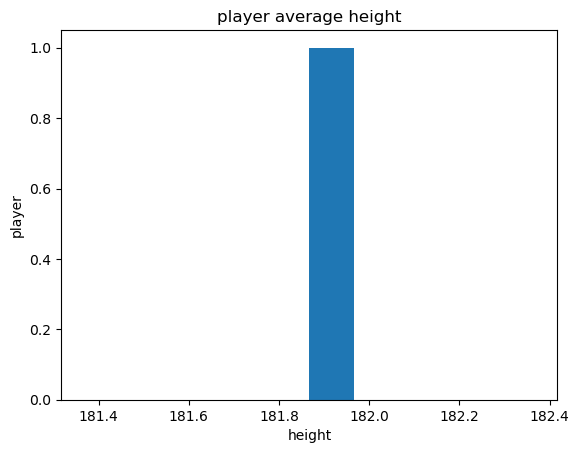

In [226]:
# i will display the mean of height by histogram
plt.hist(df_player.height.mean());
plt.xlabel('height');
plt.ylabel('player');
plt.title('player average height');

In [227]:
df_player.weight.mean()

168.38028933092224

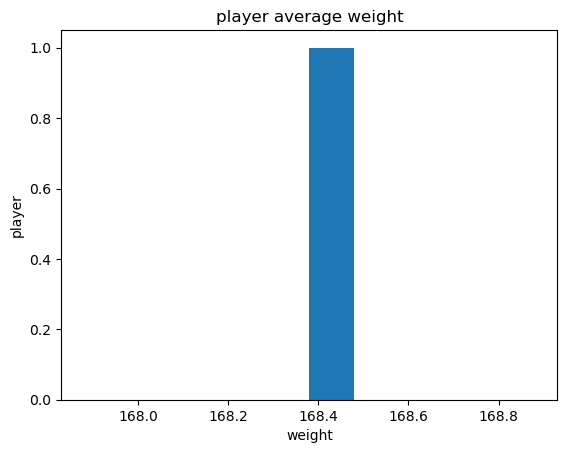

In [228]:
# i will display the mean of weight by histogram
plt.hist(df_player.weight.mean());
plt.xlabel('weight');
plt.ylabel('player');
plt.title('player average weight');


# limitation

In this section i will talk about the challanges faced me while working on data in cleaning step was there are alot of missing value in all data need to remove and there are dates need to convert to datetime,also there are name of columns need to rename to be more clear.

After cleaning when i start get more details on date i decieded to focuse on the view of the match with all details as the **country** match played in ,**the league** it was included , **the team** participate and **the score** after playing the match so that i am hardly work to conect and merge all data related by the match in new dataframe named "df_match_info".
Also i **make function** to detecte the winner team or print "Tie" if goals are equal to each other for the home and away teams after finishing the wrangling data i saved all amendments i did to cleaned dataframe, then i go to answer the questions putting in the first of investigate with visualization to be more clear i used "pie,bar,and histograme charts"

# Conclusions

**-from my poin of view for this data i will come in this section by the answer of the question i brainstorming;**

**1- the top ranked home team is "FC Barcelona" with "131 participation"**

**2-the league name which played in germany is 'Bundesliga' and it's played in germany '2448 times'**

**3-found relation between the home team name with goals, league and country :**

**like the home team named "SpVgg Greuther Fürth" played in league named" Bundesliga " at germany with 10 goals.**

**And the away team named"FC Metz" played in league named "France Ligue1"** **at france with "5 goals".**

**4- the lowest team names in score of goals is "AC Arles-Avignon" with "3 goals"**

**5-the score of goals for  "FC Barcelona" as home stadiom in season "2011/2012" is "73 goals"**

**6- the score of goals for  "FC Barcelona" as away stadiom in season "2012/2013" is "52 goals"**

**7- finally the average height of player is"181.8" , and average of weight player is "168.4".**